### All example

In [1]:
# if using Hooklog3
#%run Hooklog3.ipynb
#Hooklog = Hooklog3

# elis using NestedHooklog3
#%run NestedHooklog3.ipynb
#Hooklog = NestedHooklog3

# elis using FeatureHooklog3
%run FeatureHooklog3.ipynb
Hooklog = FeatureHooklog3

# elis using NestedFeatureHooklog3
#%run NestedFeatureHooklog3.ipynb
#Hooklog = NestedFeatureHooklog3

In [2]:
import os
import pickle

In [3]:
# input 
in_directory = "C:/Users/hsiao/Dropbox/notebook/data/morstar/" # make sure the last character is '/'
in_tag = "morstar_f"    
in_parseFirstPar = True
in_window = 1

out_tag = in_tag

In [4]:
# Hooklog
hl_list = next(os.walk(in_directory))[2] # get all filenames in the in_directory
hl_list = [os.path.join(in_directory, f) for f in hl_list] # filepathname list

hl_list = list(filter(lambda f: f.endswith(".hooklog"), hl_list)) # in case some non-hooklog file in the folder

for file in hl_list:
    hl3 = Hooklog(file, in_parseFirstPar)

In [5]:
#Test
print(hl3)
#for t, a in hl3:
#    print(t, a)

class FeatureHooklog3, C:/Users/hsiao/Dropbox/notebook/data/morstar/f9449d87262a5016f0993d99_1948.trace.hooklog, len = 1214, digit name = f9449d-1948


In [6]:
out_hl_list_pkf = 'pickle/hl_list_'+ in_tag + '.pickle'
with open(out_hl_list_pkf, 'wb') as o:
    pickle.dump(hl_list, o)

In [7]:
%run distanceMatrixJaccard.ipynb

In [8]:
# distanceMatrixJaccard

matrix = distanceMatrixJaccard(in_tag, hl_list, in_parseFirstPar, in_window)

In [9]:
out_matrix_pkf = 'pickle/matrix_'+ out_tag + '.pickle'
with open(out_matrix_pkf, 'wb') as o:
    pickle.dump(matrix, o)

In [10]:
%run UPGMA.ipynb

In [11]:
in_orientation = "right"
in_upgma_threshold = 0.4
in_figsize_x = 6
in_figsize_y = 6

out_pdf = 'output/upgma_' + out_tag + '.pdf'
out_Z_pkf = 'pickle/Z_' + out_tag + '.pickle'

In [12]:
Z = UPGMA(matrix)
label_list = [hl.split('/')[-1][:6] + '-' + hl.split('_')[-1].split('.')[0] for hl in hl_list]

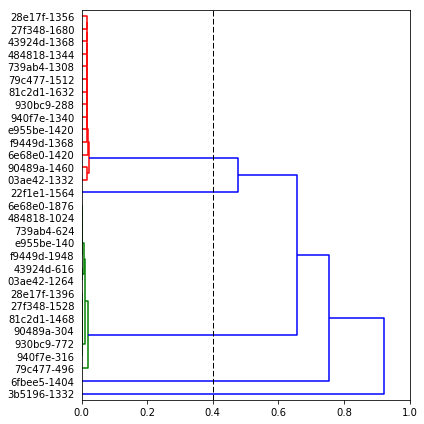

In [13]:
import scipy
import scipy.cluster.hierarchy as sch
import matplotlib.pylab as plt
%matplotlib inline

(orig_x, orig_y) = plt.rcParams['figure.figsize']
plt.rcParams['figure.figsize'] = (in_figsize_x, in_figsize_y) #---input

#MIKE: Hack the height of tree, make sure we can see them
#for z in Z:
#    if z[2] < 0.002: z[2] = 0.002
P = sch.dendrogram(Z, color_threshold = in_upgma_threshold, labels = label_list, orientation = in_orientation)

if in_orientation == "left" or in_orientation == "right": # vertical linen
    plt.axvline(x=in_upgma_threshold, linewidth=1, color='black', linestyle='--')
    plt.xlim(0.0, 1.0)
else: # horizontal line
    plt.axhline(y=in_upgma_threshold, linewidth=1, color='black', linestyle='--')
    plt.ylim(0.0, 1.0)
locs, labels = plt.yticks()
plt.setp(labels, fontsize = 10)
plt.tight_layout()

plt.rcParams['figure.figsize'] = (orig_x, orig_y)
#plt.show()
plt.savefig(out_pdf, dpi=300)

In [14]:
with open(out_Z_pkf, 'wb') as o:
    pickle.dump(Z, o)

In [15]:
%run groupingZ.ipynb

In [16]:
group_dict = groupingZ(Z, hl_list, in_upgma_threshold)

In [17]:
# Test

num_leaves = len(hl_list)
print('Total', len(group_dict), 'groups @ threshold =', in_upgma_threshold)

for g in group_dict:
    
    group_index = g
    height = group_dict[group_index][0]
    member_set = group_dict[group_index][1]
    
    print("==")
    print("G-%d, size %d, height %f" % (group_index, len(member_set), height))
    
    for m in member_set:
        pathfilename = hl_list[m]
        digitname = pathfilename.split('/')[-1][:6] + '-' + pathfilename.split('_')[-1].split('.')[0]
        print("  ", m, digitname)

Total 5 groups @ threshold = 0.4
==
G-2, size 1, height -1.000000
   2 22f1e1-1564
==
G-7, size 1, height -1.000000
   7 3b5196-1332
==
G-14, size 1, height -1.000000
   14 6fbee5-1404
==
G-54, size 14, height 0.021038
   0 03ae42-1264
   3 27f348-1528
   6 28e17f-1396
   9 43924d-616
   10 484818-1024
   13 6e68e0-1876
   16 739ab4-624
   18 79c477-496
   19 81c2d1-1468
   22 90489a-304
   24 930bc9-772
   26 940f7e-316
   27 e955be-140
   30 f9449d-1948
==
G-56, size 14, height 0.021531
   1 03ae42-1332
   4 27f348-1680
   5 28e17f-1356
   8 43924d-1368
   11 484818-1344
   12 6e68e0-1420
   15 739ab4-1308
   17 79c477-1512
   20 81c2d1-1632
   21 90489a-1460
   23 930bc9-288
   25 940f7e-1340
   28 e955be-1420
   29 f9449d-1368


In [18]:
out_group_dict_pkf = 'pickle/group_dict_' + out_tag + '.pickle'

with open(out_group_dict_pkf, 'wb') as o:
    pickle.dump(group_dict, o)

In [19]:
# output 2
#new_dir = moveHooklogByGroupDict(group_dict, hl_list, in_tag + "_g")
#print(os.path.abspath(new_dir))